In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import chebyshev_3d as Chebyshev3D
import scipy.special as sp
import scipy.integrate as integrate
import pandas as pd

In [2]:
def plot_3d(r, u, v, title, path):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot the 3D surface
    x = r*np.cos(u) * np.sin(v)
    y = r*np.sin(u) * np.sin(v)
    z = r*np.cos(v)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_title(title)
    ax.plot_surface(x, y, z, edgecolor='gray', lw=0.4, rstride=6, cstride=6, cmap='rainbow')
    fig.savefig(f'./plots/{path}_sem_curvas')

In [3]:
r, phi, theta, surface_element = Chebyshev3D.getChebyshev3d()

/home/hnrqpdr/personal-projects/chebyshev-particles/3d/chebyshev_3d.py:39: RuntimeWarning: invalid value encountered in sqrt
  surface_element = np.sqrt(((r_phi)**2 + (r**2)*(np.sin(theta)**2))*((r_theta)**2 + r**2) - (r_phi)*(r*np.sin(theta)*(np.cos(theta) - np.cos(phi)) + (r_theta)*(np.cos(phi)*np.cos(theta) + (np.sin(theta)**2))))


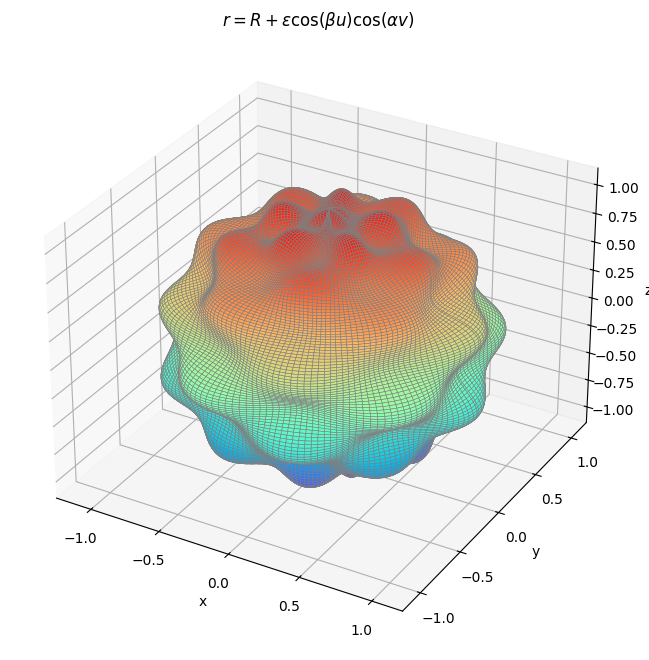

In [4]:
plot_3d(r, phi, theta, r'$r = R + \epsilon \cos(\beta u)\cos(\alpha v)$', 'cosseno_cosseno')


In [5]:
surface_element

array([[0.00000000e+00, 1.72924277e-02, 3.45630958e-02, ...,
        3.45630958e-02, 1.72924277e-02, 6.73555740e-16],
       [3.80633806e-03, 0.00000000e+00, 1.49388334e-02, ...,
        4.68440915e-02, 2.84120383e-02, 3.80633806e-03],
       [7.61989191e-03, 0.00000000e+00, 0.00000000e+00, ...,
        5.67334794e-02, 3.66393872e-02, 7.61989191e-03],
       ...,
       [7.61989191e-03, 0.00000000e+00, 0.00000000e+00, ...,
        6.04346800e-02, 3.94893970e-02, 7.61989191e-03],
       [3.80633806e-03, 0.00000000e+00, 2.43375843e-03, ...,
        4.91081914e-02, 3.02644191e-02, 3.80633806e-03],
       [1.48182263e-16, 1.72924277e-02, 3.45630958e-02, ...,
        3.45630958e-02, 1.72924277e-02, 1.17918988e-15]])

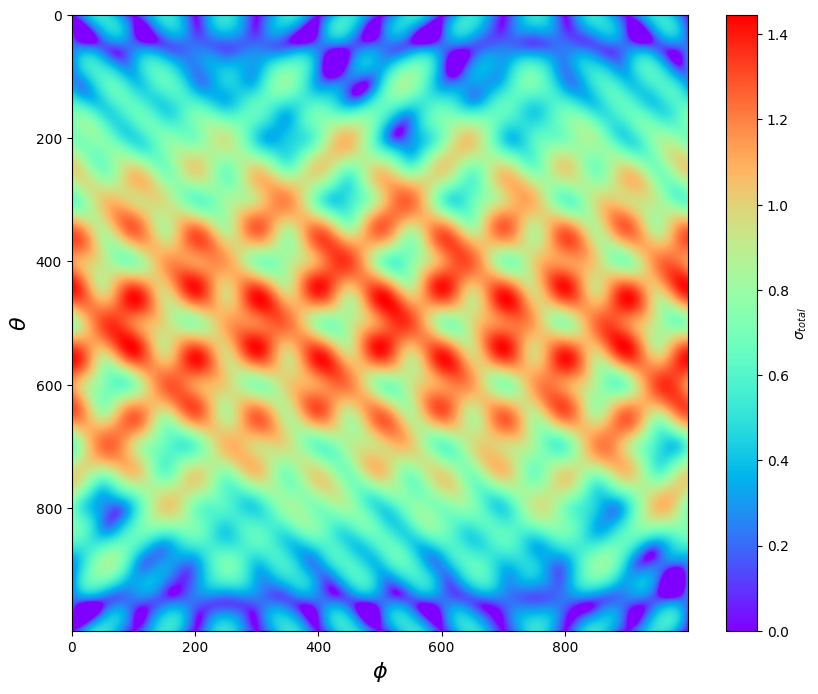

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
im = ax.imshow(surface_element, cmap='rainbow')
# ax.set_aspect(2) # you may also use am.imshow(..., aspect="auto") to restore the aspect ratio

fig.colorbar(im, ax=ax, label='$\sigma_{total}$')
ax.set_xlabel('$\\phi$', fontsize=16)
ax.set_ylabel('$\\theta$', fontsize=16)
plt.savefig('./plots/surface-element.png', dpi=400)

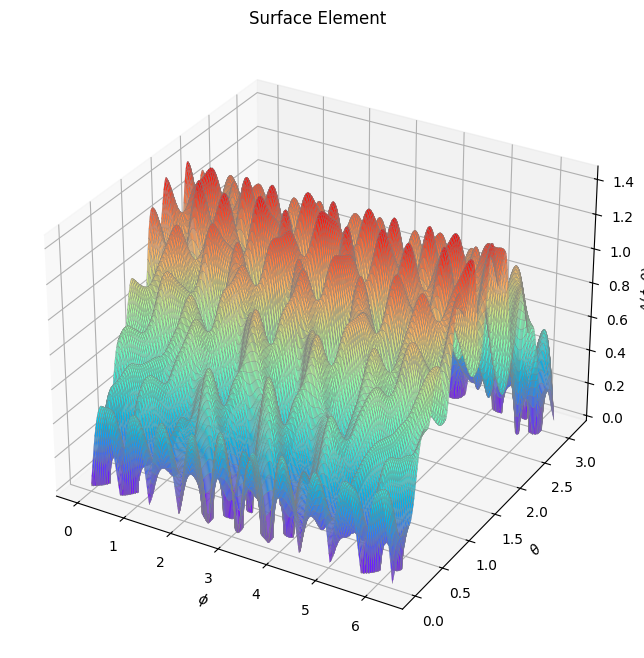

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# Plot the 3D surface

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$A(\\phi, \\theta)$')

ax.set_title('Surface Element')
ax.plot_surface(phi, theta, surface_element, edgecolor='gray', lw=0.2, rstride=4, cstride=4, cmap='rainbow')
fig.savefig(f'./plots/surfacelement.png')

In [8]:
gamma = Chebyshev3D.gamma(lambda theta, phi: (-10)*np.cos(theta), theta, phi)

In [14]:
gamma.shape

(1000, 1000)

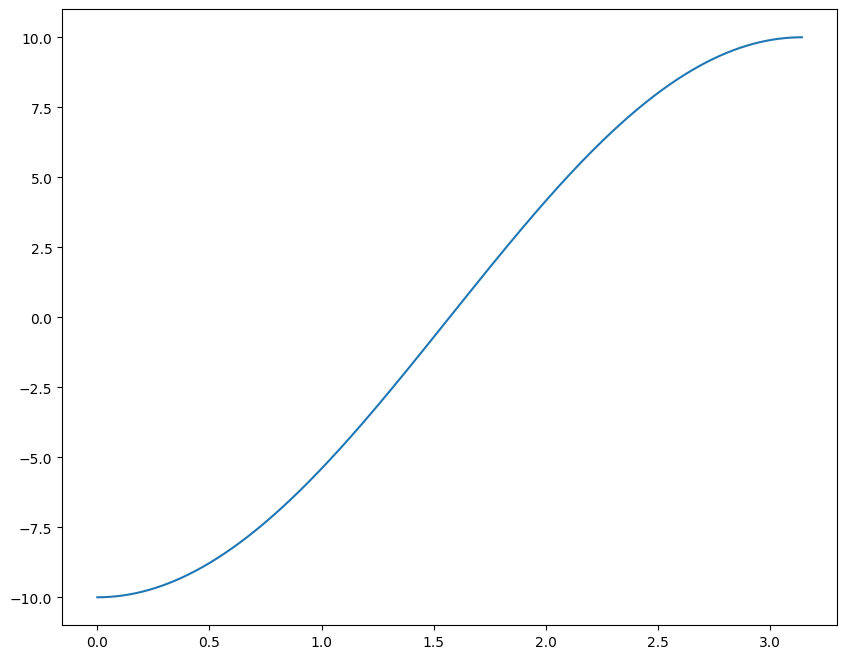

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plot the 3D surface

ax.plot(theta.flatten(), gamma.flatten(), ls='-')